In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#set style for better plots
sns.set(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize']=(10,6)

In [ ]:
#load data
df= pd.read_csv('cleaned_data.csv')
print("Data loaded successfully!")
print(f"Shape:{df.shape}")
print("\nfirst 3 rows:")
print(df.head(3))

Data loaded successfully!
Shape:(1194, 14)

first 3 rows:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-26776    9726    1275         5  Electronics  Electronic Games   
1  B-26776    9726    1275         5  Electronics  Electronic Games   
2  B-26776    9726    1275         5  Electronics  Electronic Games   

  PaymentMode  Order Date   CustomerName     State     City Year-Month  Year  \
0         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  2023   
1         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  2024   
2         UPI  2021-07-25   Robert Stone  New York  Buffalo    2021-07  2021   

   Month  
0      6  
1     12  
2      7  


In [ ]:
#descriptive statistics & univariate analysis
print("\n" + "="*60)
print("Step 1: Descriptive statistics")
print("="*60)


Step 1: Descriptive statistics


In [ ]:
# Basic info
print("Data Info:")
print(df.info())
print("\nShape:",df.shape)
print("\nColumns:",df.columns.tolist())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
 12  Year          1194 non-null   int64 
 13  Month         1194 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 130.7+ KB
None

Shape: (1194, 14)

Columns: ['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category', 'PaymentMode', 'Order Date', 'CustomerName', 'State

In [ ]:
# summary statistics
print("\nNumeric columns summary:")
print(df[['Amount','Profit', 'Quantity']].describe())


Numeric columns summary:
            Amount       Profit     Quantity
count  1194.000000  1194.000000  1194.000000
mean   5178.089615  1348.992462    10.674204
std    2804.921955  1117.992573     5.777102
min     508.000000    50.000000     1.000000
25%    2799.000000   410.000000     6.000000
50%    5152.000000  1014.000000    11.000000
75%    7626.000000  2035.000000    16.000000
max    9992.000000  4930.000000    20.000000


In [ ]:
print("\nCategorical columns summary:")
print(df[['Category', 'Sub-Category', 'State', 'PaymentMode']].describe(include='object'))



Categorical columns summary:
         Category Sub-Category     State PaymentMode
count        1194         1194      1194        1194
unique          3           12         6           5
top     Furniture       Tables  New York  Debit Card
freq          407          122       226         260


In [ ]:
# Missing values & duplicates
print("\n Misiingvalues:")
print(df.isnull().sum())
print("\nDuplicates:",df.duplicated().sum())


 Misiingvalues:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
Year            0
Month           0
dtype: int64

Duplicates: 0



 Generating numeric univariate plots...


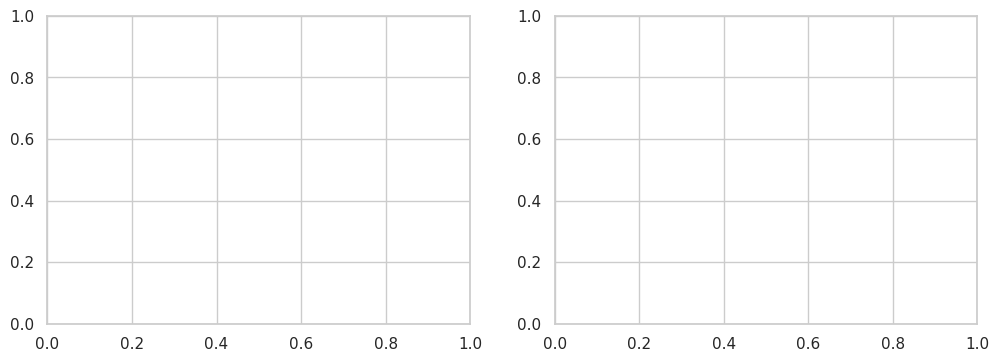

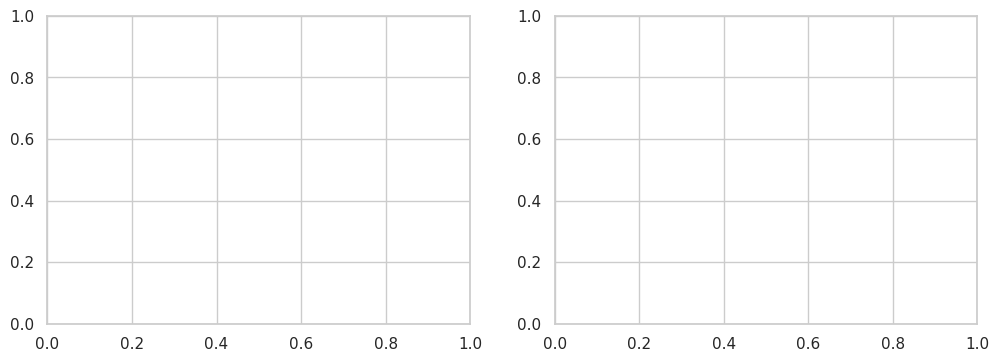

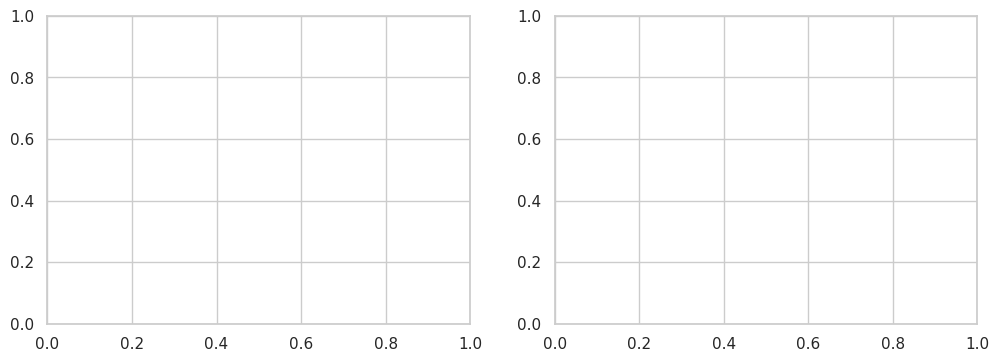

In [ ]:
# univariate plots - numeric
print("\n Generating numeric univariate plots...")
num_cols=['Amount', 'Profit', 'Quantity']
for col in num_cols:
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))


In [ ]:
# Histogram
sns.histplot(df[col], kde=True, ax=ax1)
ax1.set_title(f'{col} Distribution')

Text(0.5, 1.0, 'Quantity Distribution')

In [ ]:
# Boxplot
sns.boxplot(df[col], ax=ax2)
ax2.set_title(f'{col} Boxplot (Outliers)')

Text(0.5, 1.0, 'Quantity Boxplot (Outliers)')

In [ ]:
plt.tight_layout()
plt.show()

print(f"{col}: Mean={df[col].mean():.2f}. Median={df[col].median():2f}, Std={df[col].std():.2f}")

<Figure size 1000x600 with 0 Axes>

Quantity: Mean=10.67. Median=11.000000, Std=5.78


In [ ]:
# Univariate Plots - Categorical
print("\n Generating Categorical univariate plots...")


 Generating Categorical univariate plots...


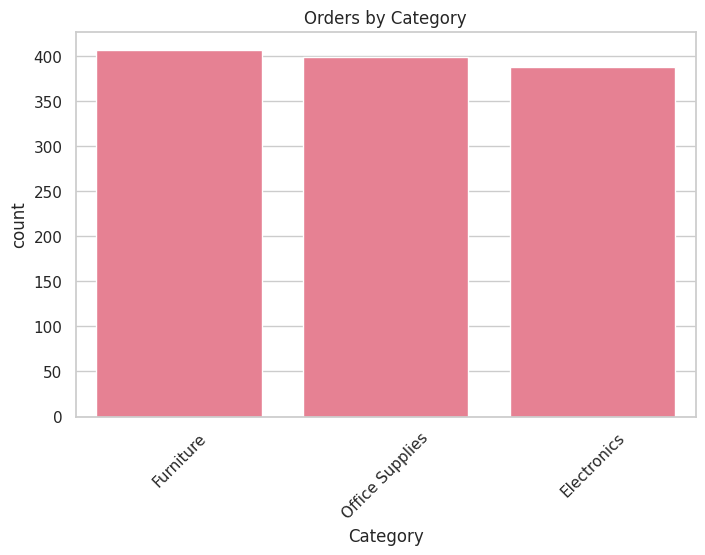

In [ ]:
# Categories
plt.figure(figsize=(8,5))
sns.countplot(x='Category', data = df, order=df['Category'].value_counts().index)
plt.title('Orders by Category')
plt.xticks(rotation=45)
plt.show()

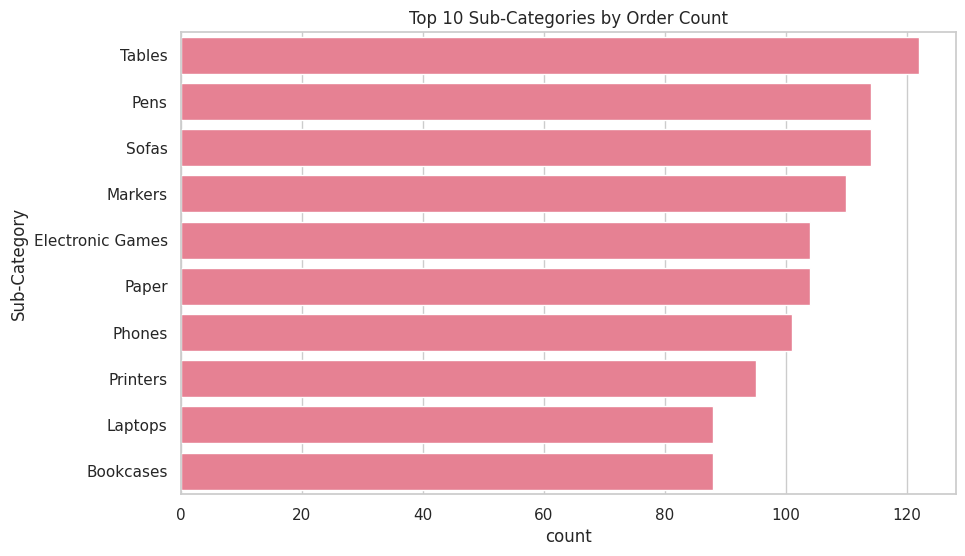

In [ ]:
#Top 10 Sub-Categories
plt.figure(figsize=(10, 6))
top_subs = df['Sub-Category'].value_counts().head(10).index
sns.countplot(y='Sub-Category', data=df[df['Sub-Category'].isin(top_subs)],
              order=top_subs)
plt.title('Top 10 Sub-Categories by Order Count')
plt.show()

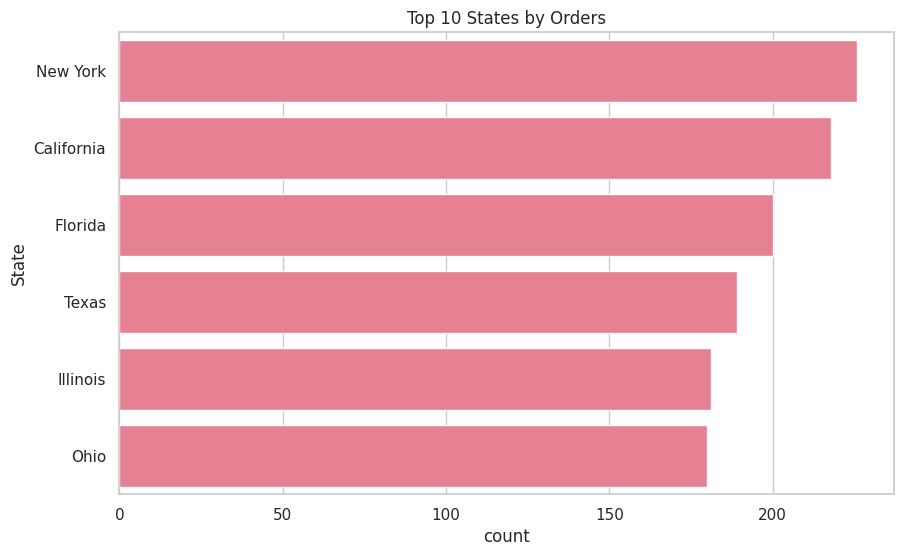

In [ ]:
# Top 10 States
plt.figure(figsize=(10, 6))
top_states = df['State'].value_counts().head(10).index
sns.countplot(y='State', data=df[df['State'].isin(top_states)], order=top_states)
plt.title('Top 10 States by Orders')
plt.show()

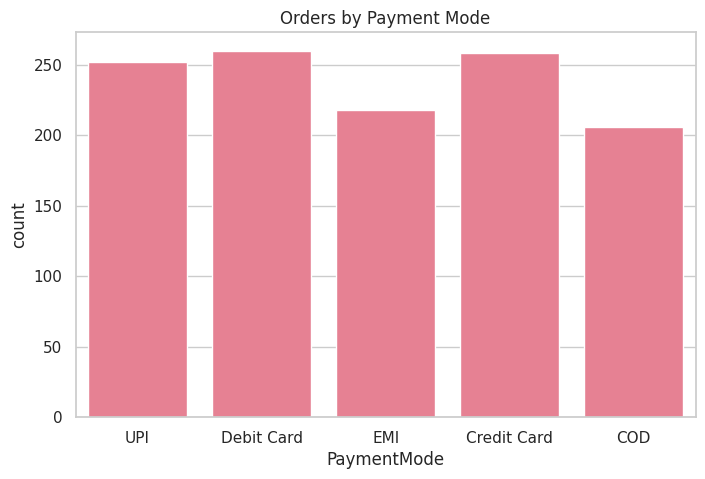

In [ ]:
# Payment Mode
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMode', data=df)
plt.title('Orders by Payment Mode')
plt.show()

In [ ]:
print("\n" + "="*60)
print("STEP 2: MULTIVARIATE ANALYSIS")
print("="*60)


STEP 2: MULTIVARIATE ANALYSIS


In [ ]:
# Correlation Heatmap
print("Correlation between numeric variables:")
num_df = df[['Amount', 'Profit', 'Quantity']].dropna()
corr = num_df.corr()

Correlation between numeric variables:


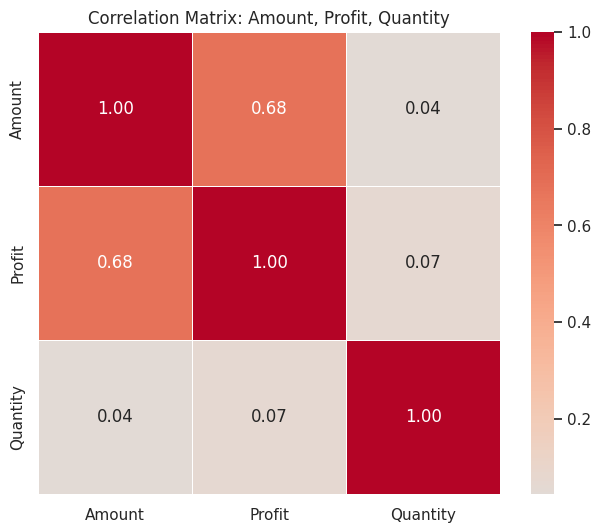

          Amount  Profit  Quantity
Amount      1.00    0.68      0.04
Profit      0.68    1.00      0.07
Quantity    0.04    0.07      1.00


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Amount, Profit, Quantity')
plt.show()
print(corr.round(2))

Pairplot of numeric variables:


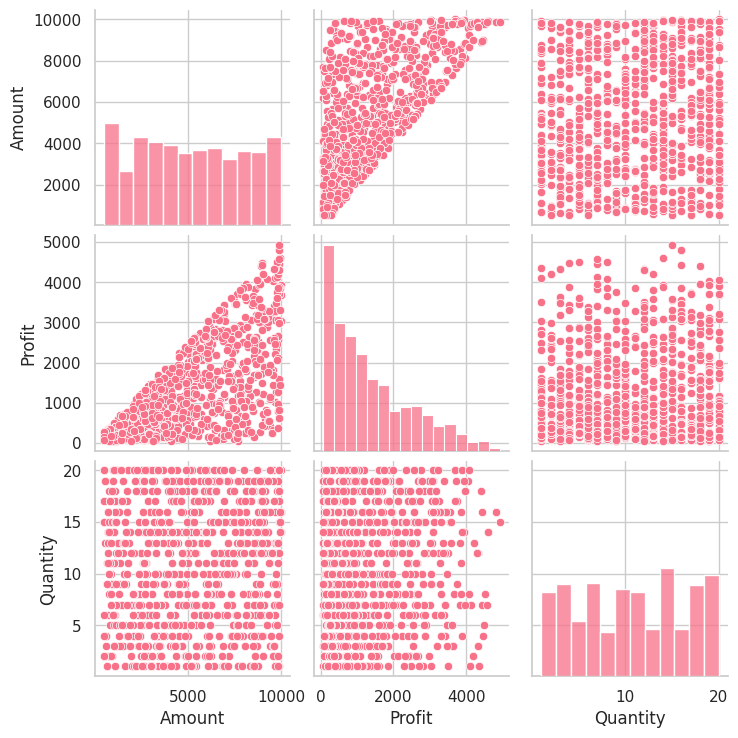

In [ ]:
# Pairplot
print("Pairplot of numeric variables:")
sns.pairplot(num_df)
plt.show()

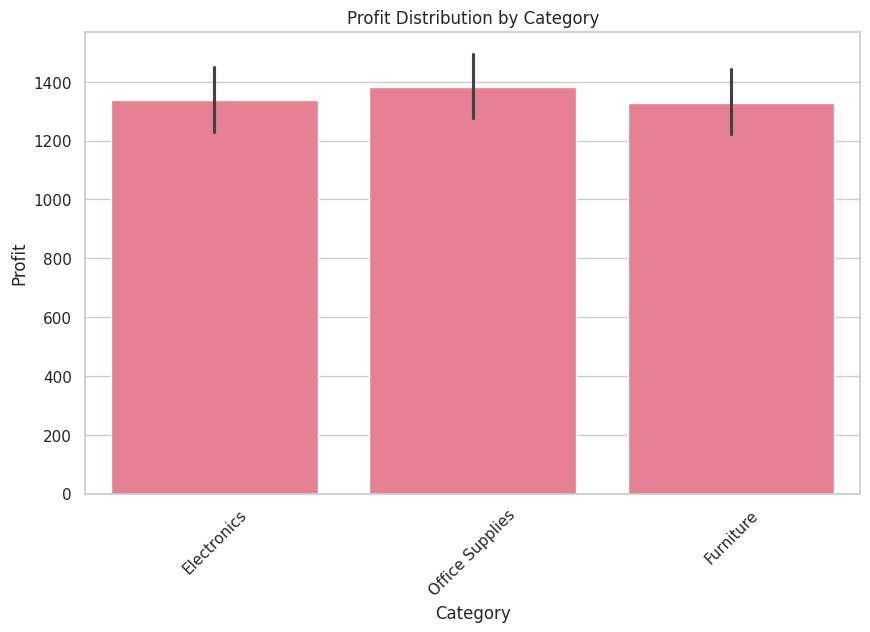

In [ ]:
# bivariate :profit by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.xticks(rotation=45)
plt.show()

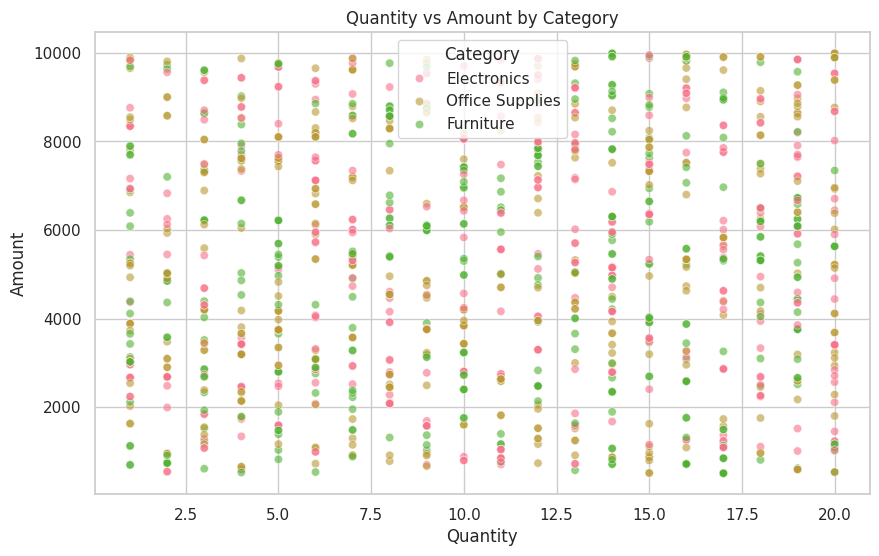

In [ ]:
#Bivariate: Amount vs Quantity by Category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Amount', hue='Category', data=df, alpha=0.6)
plt.title('Quantity vs Amount by Category')
plt.show()

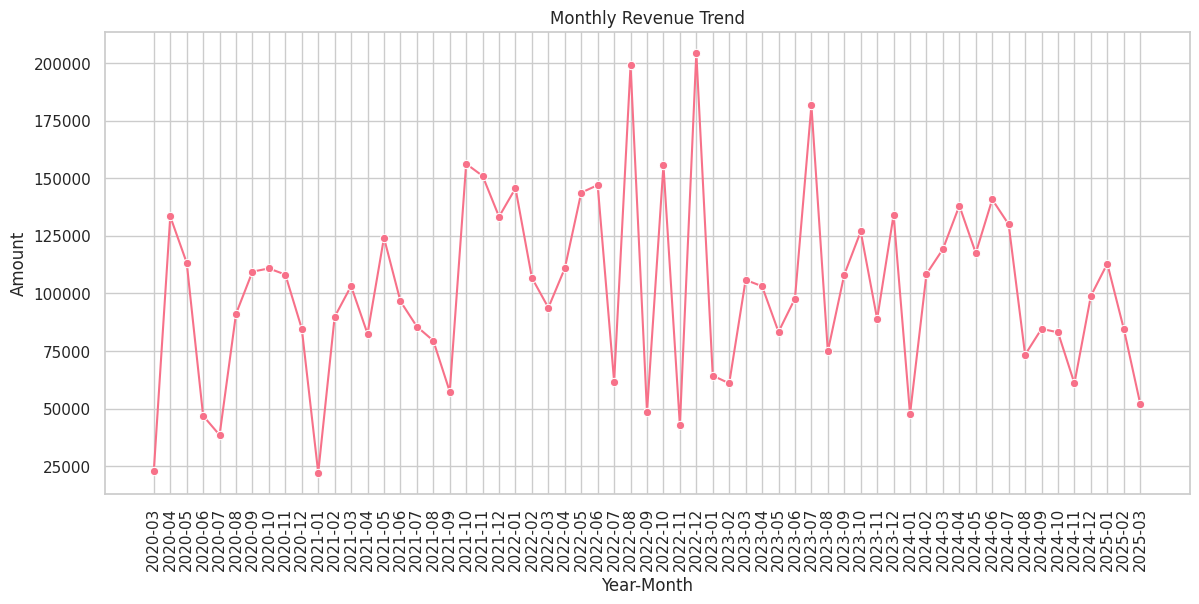

In [ ]:
# Monthly Revenue Trend
monthly = df.groupby('Year-Month', as_index=False)['Amount'].sum().sort_values('Year-Month')
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year-Month', y='Amount', data=monthly, marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=90)
plt.show()


In [ ]:
print("\n" + "="*60)
print("STEP 3: BUSINESS INTELLIGENCE METRICS")
print("="*60)


STEP 3: BUSINESS INTELLIGENCE METRICS


In [ ]:
# KPIs
total_revenue = df['Amount'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
avg_order_value = df['Amount'].mean()

In [ ]:
print("KEY PERFORMANCE INDICATORS:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${avg_order_value:.2f}")

KEY PERFORMANCE INDICATORS:
Total Revenue: $6,182,639.00
Total Profit: $1,610,697.00
Total Orders: 547
Average Order Value: $5178.09


In [ ]:
# Top 5 Sub-Categories by Revenue
top_subs_rev = df.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Sub-Categories by Revenue:")
print(top_subs_rev)


Top 5 Sub-Categories by Revenue:
Sub-Category
Markers             627875
Tables              625177
Sofas               568367
Printers            566359
Electronic Games    565092
Name: Amount, dtype: int64


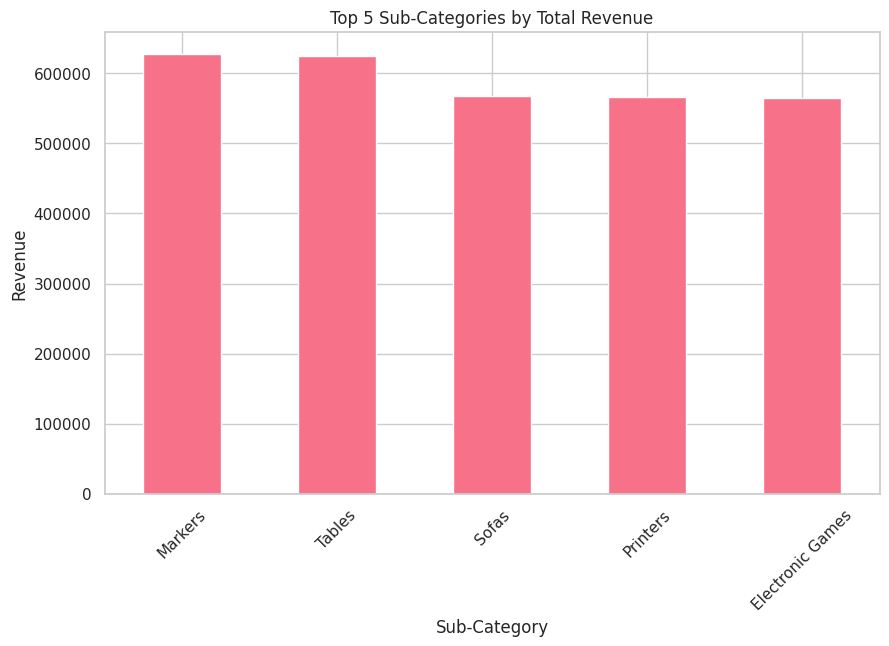

In [ ]:
plt.figure(figsize=(10, 6))
top_subs_rev.plot(kind='bar')
plt.title('Top 5 Sub-Categories by Total Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


Top 10 States by Total Profit:
State
Florida       308706
New York      308506
California    278814
Texas         257780
Illinois      240372
Ohio          216519
Name: Profit, dtype: int64


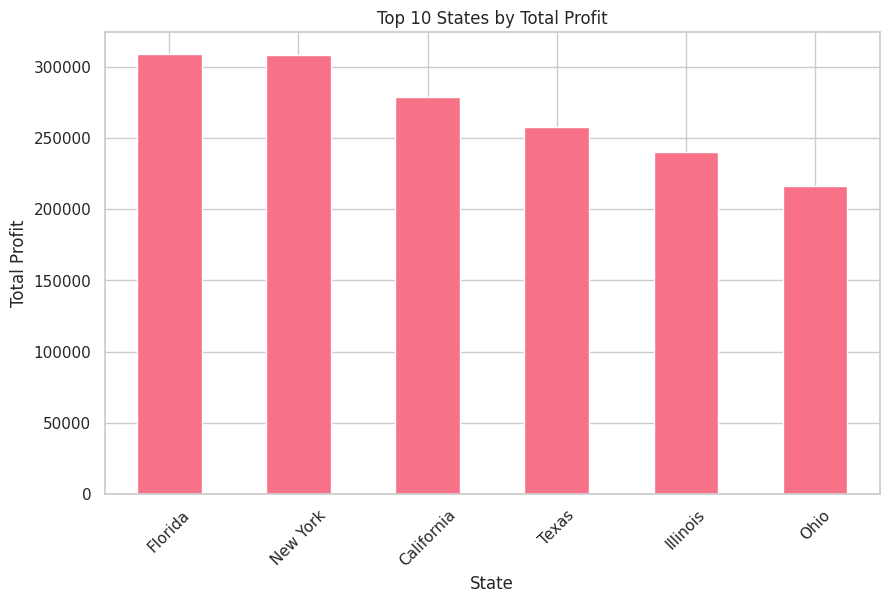

In [ ]:
# State-wise Profit
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 States by Total Profit:")
print(state_profit)

plt.figure(figsize=(10, 6))
state_profit.plot(kind='bar')
plt.title('Top 10 States by Total Profit')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


Payment Mode Analysis:
              Amount  Order ID  Avg Order Value
PaymentMode                                    
COD          1141790       137      8334.233577
Credit Card  1281044       151      8483.735099
Debit Card   1395035       154      9058.668831
EMI          1114297       142      7847.161972
UPI          1250473       151      8281.278146


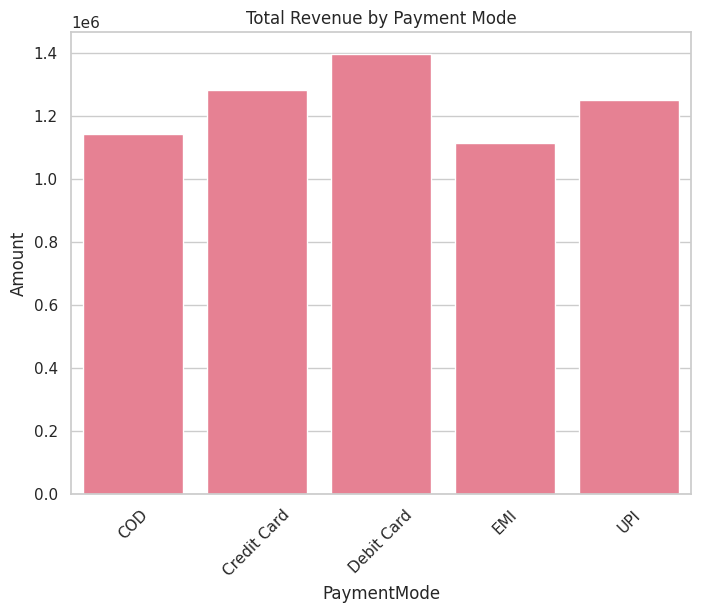

In [ ]:
# Payment Mode Analysis
payment_analysis = df.groupby('PaymentMode').agg({
    'Amount': 'sum',
    'Order ID': 'nunique'
}).round(2)
payment_analysis['Avg Order Value'] = payment_analysis['Amount'] / payment_analysis['Order ID']
print("\nPayment Mode Analysis:")
print(payment_analysis)

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_analysis.index, y='Amount', data=payment_analysis.reset_index())
plt.title('Total Revenue by Payment Mode')
plt.xticks(rotation=45)
plt.show()


Average Order Value by Category:
Category
Electronics        5294.989691
Office Supplies    5236.867168
Furniture          5009.024570
Name: Amount, dtype: float64


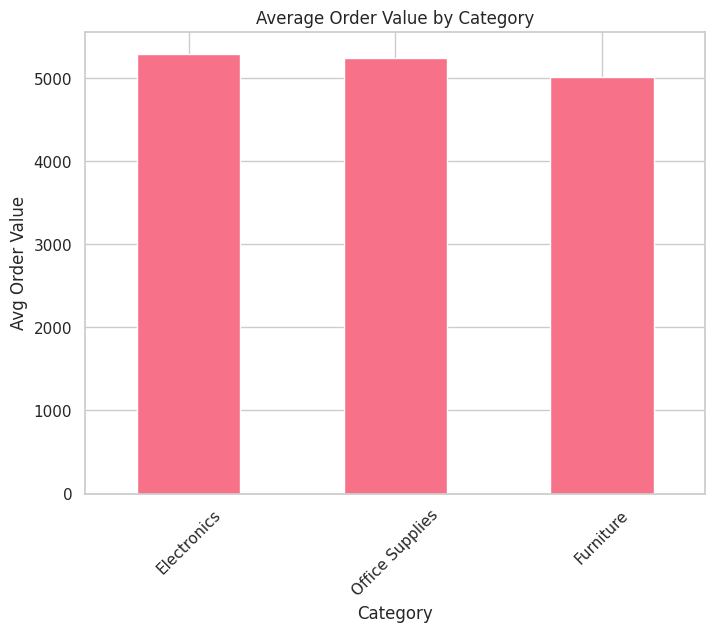

In [ ]:
# Category-wise Average Order Value
cat_avg = df.groupby('Category')['Amount'].mean().sort_values(ascending=False)
print("\nAverage Order Value by Category:")
print(cat_avg)

plt.figure(figsize=(8, 6))
cat_avg.plot(kind='bar')
plt.title('Average Order Value by Category')
plt.ylabel('Avg Order Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("\n" + "="*60)
print("STEP 4: DASHBOARD DATA READY")
print("="*60)


STEP 4: DASHBOARD DATA READY


In [ ]:
# Export key tables for PowerPoint/Excel dashboard
kpi_df = pd.DataFrame({
    'Metric': ['Total Revenue', 'Total Profit', 'Total Orders', 'Avg Order Value'],
    'Value': [total_revenue, total_profit, total_orders, avg_order_value]
})
print("KPIs for Dashboard:")
print(kpi_df)

top_subs_table = pd.DataFrame({
    'Sub-Category': top_subs_rev.index,
    'Total Revenue': top_subs_rev.values
})
print("\nTop 5 Sub-Categories Table:")
print(top_subs_table)

state_profit_table = pd.DataFrame({
    'State': state_profit.index,
    'Total Profit': state_profit.values
})
print("\nTop 10 States Profit Table:")
print(state_profit_table.head())

KPIs for Dashboard:
            Metric         Value
0    Total Revenue  6.182639e+06
1     Total Profit  1.610697e+06
2     Total Orders  5.470000e+02
3  Avg Order Value  5.178090e+03

Top 5 Sub-Categories Table:
       Sub-Category  Total Revenue
0           Markers         627875
1            Tables         625177
2             Sofas         568367
3          Printers         566359
4  Electronic Games         565092

Top 10 States Profit Table:
        State  Total Profit
0     Florida        308706
1    New York        308506
2  California        278814
3       Texas        257780
4    Illinois        240372


In [ ]:
# Save all tables for easy copy-paste into Excel/PowerPoint
kpi_df.to_csv('kpi_dashboard.csv', index=False)
top_subs_table.to_csv('top_subs_dashboard.csv', index=False)
state_profit_table.to_csv('state_profit_dashboard.csv', index=False)
monthly.to_csv('monthly_revenue_dashboard.csv', index=False)
